In [7]:
"""
Preprocesamiento y División de Dataset
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter

# ============================================
# 1. CARGA Y ANÁLISIS EXPLORATORIO
# ============================================

# Cargar dataset
df = pd.read_excel('../data/raw/dataset_depresion.xlsx')
print(f"Forma inicial del dataset: {df.shape}")
print(f"\nColumnas: {df.columns.tolist()}\n")

# Análisis de la variable target
print("="*60)
print("ANÁLISIS DE VARIABLES TARGET")
print("="*60)

print("\n1. depression_level (Test de Beck):")
print(df['depression_level'].value_counts().sort_index())
print(f"   Distribución: {df['depression_level'].value_counts(normalize=True).sort_index()}")

print("\n2. manual_classification (Validación psicólogos - 0/1):")
print(df['manual_classification'].value_counts().sort_index())
print(f"   Distribución: {df['manual_classification'].value_counts(normalize=True).sort_index()}")


Forma inicial del dataset: (1136, 12)

Columnas: ['id', 'personal_key', 'beck_range', 'depression_level', 'text', 'manual_classification', 'age', 'occupation', 'max_level_studies', 'residence', 'marital_status', 'Tiempo']

ANÁLISIS DE VARIABLES TARGET

1. depression_level (Test de Beck):
depression_level
1    450
2    245
3    136
4    196
5    108
6      1
Name: count, dtype: int64
   Distribución: depression_level
1    0.396127
2    0.215669
3    0.119718
4    0.172535
5    0.095070
6    0.000880
Name: proportion, dtype: float64

2. manual_classification (Validación psicólogos - 0/1):
manual_classification
0    695
1    441
Name: count, dtype: int64
   Distribución: manual_classification
0    0.611796
1    0.388204
Name: proportion, dtype: float64



3. Relación entre depression_level y manual_classification:
manual_classification         0         1
depression_level                         
1                      1.000000  0.000000
2                      0.995918  0.004082
3                      0.007353  0.992647
4                      0.000000  1.000000
5                      0.000000  1.000000
6                      0.000000  1.000000


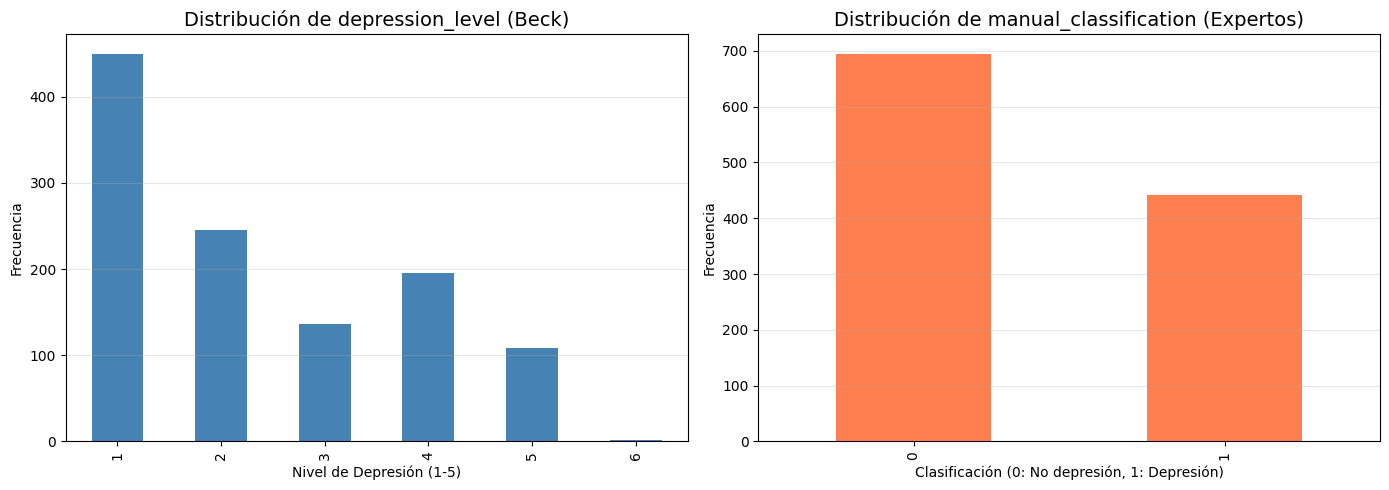

In [9]:

# Analizar relación entre ambas variables
print("\n3. Relación entre depression_level y manual_classification:")
cross_tab = pd.crosstab(df['depression_level'], df['manual_classification'], normalize='index')
print(cross_tab)

# Visualizar distribución
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: depression_level
df['depression_level'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Distribución de depression_level (Beck)', fontsize=14)
axes[0].set_xlabel('Nivel de Depresión (1-5)')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: manual_classification
df['manual_classification'].value_counts().sort_index().plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Distribución de manual_classification (Expertos)', fontsize=14)
axes[1].set_xlabel('Clasificación (0: No depresión, 1: Depresión)')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [10]:

# ============================================
# 2. DECISIÓN DE TARGET Y JUSTIFICACIÓN
# ============================================

print("\n" + "="*60)
print("DECISIÓN: Usar 'manual_classification' como target")
print("="*60)

# Definir target
target_column = 'manual_classification'
y = df[target_column]



DECISIÓN: Usar 'manual_classification' como target


In [12]:

# ============================================
# 3. VERIFICACIÓN DE DESBALANCEO
# ============================================

print("\n" + "="*60)
print("ANÁLISIS DE DESBALANCEO DE CLASES")
print("="*60)

class_counts = y.value_counts().sort_index()
class_ratio = class_counts.max() / class_counts.min()

print(f"\nDistribución absoluta:")
print(class_counts)
print(f"\nDistribución relativa:")
print(y.value_counts(normalize=True).sort_index())
print(f"\nRatio de desbalanceo: {class_ratio:.2f}:1")

if class_ratio > 1.5:
    print("\n Dataset desbalanceado detectado (ratio > 1.5)")
    print("   Usar class_weight='balanced' en clasificadores")
    print("   o técnicas de oversampling/undersampling")
else:
    print("\n✓ Dataset balanceado (ratio <= 1.5)")



ANÁLISIS DE DESBALANCEO DE CLASES

Distribución absoluta:
manual_classification
0    695
1    441
Name: count, dtype: int64

Distribución relativa:
manual_classification
0    0.611796
1    0.388204
Name: proportion, dtype: float64

Ratio de desbalanceo: 1.58:1

 Dataset desbalanceado detectado (ratio > 1.5)
   Usar class_weight='balanced' en clasificadores
   o técnicas de oversampling/undersampling


In [13]:

# ============================================
# 4. DIVISIÓN DEL CONJUNTO (80-10-10)
# ============================================

print("\n" + "="*60)
print("DIVISIÓN DEL CONJUNTO DE DATOS")
print("="*60)

# Opción 1: División estratificada 80-10-10 (RECOMENDADA)
print("\n Usando división 80% Train - 10% Val - 10% Test")

# Paso 1: Separar conjunto de prueba (10%)
train_val_df, test_df = train_test_split(
    df,
    test_size=0.10,
    random_state=42,
    stratify=df[target_column]
)

# Paso 2: Separar entrenamiento y validación (80% y 10% del total)
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.1111,  # 10 / 90 = 0.1111
    random_state=42,
    stratify=train_val_df[target_column]
)

print(f"\n✓ Tamaño del conjunto de entrenamiento: {len(train_df)} ({len(train_df)/len(df)*100:.1f}%)")
print(f"✓ Tamaño del conjunto de validación: {len(val_df)} ({len(val_df)/len(df)*100:.1f}%)")
print(f"✓ Tamaño del conjunto de prueba: {len(test_df)} ({len(test_df)/len(df)*100:.1f}%)")

# Verificar estratificación
print("\n📊 Verificación de estratificación:")
print("\nDistribución en ENTRENAMIENTO:")
print(train_df[target_column].value_counts(normalize=True).sort_index())
print("\nDistribución en VALIDACIÓN:")
print(val_df[target_column].value_counts(normalize=True).sort_index())
print("\nDistribución en PRUEBA:")
print(test_df[target_column].value_counts(normalize=True).sort_index())

# Verificación estadística de estratificación
from scipy.stats import chi2_contingency

contingency = pd.DataFrame({
    'train': train_df[target_column].value_counts().sort_index(),
    'val': val_df[target_column].value_counts().sort_index(),
    'test': test_df[target_column].value_counts().sort_index()
})

chi2, p_value, dof, expected = chi2_contingency(contingency)
print(f"\n✓ Test Chi-cuadrado de independencia: p-value = {p_value:.4f}")
if p_value > 0.05:
    print("  → Distribuciones estadísticamente similares (p > 0.05) ✓")
else:
    print("  → ADVERTENCIA: Distribuciones pueden diferir (p <= 0.05)")



DIVISIÓN DEL CONJUNTO DE DATOS

 Usando división 80% Train - 10% Val - 10% Test

✓ Tamaño del conjunto de entrenamiento: 908 (79.9%)
✓ Tamaño del conjunto de validación: 114 (10.0%)
✓ Tamaño del conjunto de prueba: 114 (10.0%)

📊 Verificación de estratificación:

Distribución en ENTRENAMIENTO:
manual_classification
0    0.611233
1    0.388767
Name: proportion, dtype: float64

Distribución en VALIDACIÓN:
manual_classification
0    0.614035
1    0.385965
Name: proportion, dtype: float64

Distribución en PRUEBA:
manual_classification
0    0.614035
1    0.385965
Name: proportion, dtype: float64

✓ Test Chi-cuadrado de independencia: p-value = 0.9970
  → Distribuciones estadísticamente similares (p > 0.05) ✓


In [14]:

# ============================================
# 5. ANÁLISIS DE LONGITUD DE TEXTOS
# ============================================

print("\n" + "="*60)
print("ANÁLISIS DE LONGITUD DE TEXTOS")
print("="*60)

df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print(f"\nEstadísticas de longitud de caracteres:")
print(df['text_length'].describe())

print(f"\nEstadísticas de conteo de palabras:")
print(df['word_count'].describe())

# Verificar si hay textos muy cortos o vacíos
short_texts = df[df['word_count'] < 5]
if len(short_texts) > 0:
    print(f"\n ADVERTENCIA: {len(short_texts)} textos con < 5 palabras detectados")
    print("   Revisar calidad de estos registros")



ANÁLISIS DE LONGITUD DE TEXTOS

Estadísticas de longitud de caracteres:
count     1136.000000
mean      1220.984155
std       1135.214002
min         79.000000
25%        311.750000
50%        898.000000
75%       1920.250000
max      10249.000000
Name: text_length, dtype: float64

Estadísticas de conteo de palabras:
count    1136.000000
mean      225.265845
std       211.047724
min        11.000000
25%        57.000000
50%       166.500000
75%       356.000000
max      1946.000000
Name: word_count, dtype: float64


In [15]:

# ============================================
# 6. GUARDAR CONJUNTOS PROCESADOS
# ============================================

print("\n" + "="*60)
print("GUARDANDO CONJUNTOS DE DATOS")
print("="*60)

PROCESSED_PATH = "../data/processed/"

# Guardar con información adicional
train_df.to_csv(PROCESSED_PATH + "train.csv", index=False)
val_df.to_csv(PROCESSED_PATH + "validation.csv", index=False)
test_df.to_csv(PROCESSED_PATH + "test.csv", index=False)

# Guardar también los índices para reproducibilidad
pd.DataFrame({
    'train_indices': train_df.index,
}).to_csv(PROCESSED_PATH + "train_indices.csv", index=False)

pd.DataFrame({
    'val_indices': val_df.index,
}).to_csv(PROCESSED_PATH + "val_indices.csv", index=False)

pd.DataFrame({
    'test_indices': test_df.index,
}).to_csv(PROCESSED_PATH + "test_indices.csv", index=False)

print(f"\n✅ Archivos guardados exitosamente en: {PROCESSED_PATH}")
print("""
Archivos generados:
- train.csv (entrenamiento)
- validation.csv (validación)
- test.csv (prueba)
- train_indices.csv (índices de registros)
- val_indices.csv
- test_indices.csv
""")



GUARDANDO CONJUNTOS DE DATOS

✅ Archivos guardados exitosamente en: ../data/processed/

Archivos generados:
- train.csv (entrenamiento)
- validation.csv (validación)
- test.csv (prueba)
- train_indices.csv (índices de registros)
- val_indices.csv
- test_indices.csv

